In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#データをtrain, validation用に分割するモジュール
from sklearn.model_selection import train_test_split
#Logistic回帰
from sklearn.linear_model import LogisticRegression
#評価用モジュール
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
#標準化モジュール
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
train=pd.read_csv("../input/home-credit-default-risk/application_train.csv")
test=pd.read_csv("../input/home-credit-default-risk/application_test.csv")

In [4]:
print(train.shape,test.shape)

(307511, 122) (48744, 121)


In [5]:
train.select_dtypes(include=object).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [6]:
test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [7]:
train.isnull().sum() #欠損はない

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
re1=[i for i in train.select_dtypes(include=object).columns]
re2=[i for i in test.select_dtypes(include=object).columns]
# dw=[]
# for i in re:
#   print(i,len(train[i].unique()))

In [9]:
print(train.shape,test.shape)

(307511, 122) (48744, 121)


In [10]:
train=pd.get_dummies(train, columns=list(re1)) 
test=pd.get_dummies(test,columns=list(re2))

In [11]:
print(train.shape,test.shape)

(307511, 246) (48744, 242)


In [12]:
y=train["TARGET"]
# y
train.drop("TARGET",axis=1,inplace=True)

In [13]:
for i in train.columns:
    if i not in test.columns:
        train.drop(i,axis=1,inplace=True)
        print(i)

CODE_GENDER_XNA
NAME_INCOME_TYPE_Maternity leave
NAME_FAMILY_STATUS_Unknown


In [14]:
print(train.shape,test.shape)

(307511, 242) (48744, 242)


In [15]:
# y.isnull().sum()
print(train.isnull().sum().sum(),test.isnull().sum().sum())
#欠損地あると飲ませられない

8388094 1285385


In [16]:
# 欠損値　ひとまず平均値補間
# train['AMT_INCOME_TOTAL'].isnull().sum()
for i in train.columns:
  me=train[i].median()
  if train[i].isnull().sum() > 0:
    train[i].fillna(me,inplace=True)

In [17]:
for i in test.columns:
  me=test[i].median()
  if test[i].isnull().sum() > 0:
    test[i].fillna(me,inplace=True)

In [18]:
train=pd.DataFrame(train)
test=pd.DataFrame(test)
test.isnull().sum().sum()


0

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler

#標準化
#標準化
# ss=StandardScaler()
# ss.fit(train)
# train=ss.transform(train)

# sc=StandardScaler()
# sc.fit(test)
# test=sc.transform(test)

# train=pd.DataFrame(train)
# test=pd.DataFrame(test)

# train.columns=ftr_name
# test.columns=fte_name

#標準化
# train = StandardScaler().fit_transform(train)

X_train,X_test,y_train,y_test=train_test_split(train,y,random_state=1
                                               ,test_size=0.2,stratify=y)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,test.shape)

(246008, 242) (61503, 242) (246008,) (61503,) (48744, 242)


In [20]:

#インスタンス化
log=LogisticRegression()
#学習
log.fit(X_train,y_train)
#予測
y_pred=log.predict_proba(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
y_pred.shape

(61503, 2)

In [22]:
y_pred

array([[0.96700938, 0.03299062],
       [0.90400129, 0.09599871],
       [0.89000727, 0.10999273],
       ...,
       [0.90609225, 0.09390775],
       [0.88349628, 0.11650372],
       [0.90593317, 0.09406683]])

In [23]:
y_pred=y_pred[:,1]

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

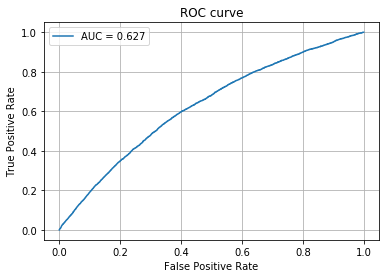

In [25]:
#ROC曲線プロット
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

#fillna(mean)→AUC=0.505

In [26]:
y_pred=log.predict_proba(test)

In [27]:
y_pred=y_pred[:,1]

In [28]:
sample=pd.read_csv('../input/home-credit-default-risk/sample_submission.csv')
sample.head()


,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [29]:
print(sample.shape,len(y_pred))

(48744, 2) 48744


In [30]:

# y_pred2=model.predict(test,num_iteration=model.best_iteration)
sample['TARGET']=y_pred
sample.to_csv("submission.csv",index=False)